In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url = "https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/Exercise/titanic.csv"
my_df = pd.read_csv(url)
my_df

In [ ]:
# Convert the string values to int using lambda
my_df['Sex_num'] = my_df['Sex'].apply(lambda x: 1 if x=='female' else 0)
my_df

In [32]:
inputs = my_df.drop(['PassengerId','Name','SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Survived', 'Sex'], axis='columns')
target = my_df['Survived']
inputs.shape, target.shape

((891, 4), (891,))

In [34]:
  # Filling the NaN values of the dataset with mean values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

inputs = imputer.fit_transform(inputs)
inputs.shape, target.shape

((891, 4), (891,))

In [ ]:
# Convert the string values to int
#from sklearn.preprocessing import LabelEncoder
#le_sex = LabelEncoder()
#inputs['Sex'] = le_sex.fit_transform(inputs['Sex'])
#inputs

In [35]:
#Splitting into train and test
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, target_train, target_test = train_test_split(inputs, target, test_size=0.2, random_state=88)
print("Training sets: ", inputs_train.shape, target_train.shape)
print("Testing sets: ", inputs_test.shape, target_test.shape)

Training sets:  (712, 4) (712,)
Testing sets:  (179, 4) (179,)


In [36]:
# Build the Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [37]:
# Train the model using Training data

model.fit(inputs_train, target_train)


GaussianNB()

In [38]:
print("Model prediction score: ", model.score(inputs_test, target_test))

Model prediction score:  0.776536312849162


In [39]:
# Getting predicted values from the model using testing dataset
target_pred = model.predict(inputs_test)
target_pred.shape, target_test.shape

((179,), (179,))

Model accuracy score:  0.776536312849162
Model precision score:  0.6486486486486487
Model f1 score:  0.7058823529411764
Model recall score:  0.7741935483870968
Model roc-auc score:  0.7759856630824373
Model confusion matrix:  [[91 26]
 [14 48]]


Text(33.22222222222222, 0.5, 'Predicted')

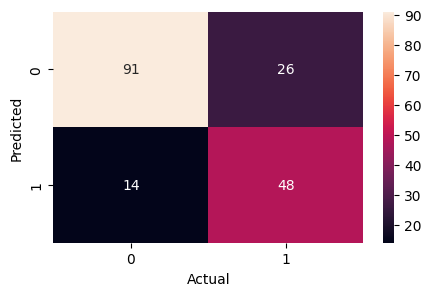

In [40]:
# Evaluating the performance
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_auc_score, confusion_matrix
print("Model accuracy score: ", accuracy_score(target_test, target_pred))
print("Model precision score: ", precision_score(target_test, target_pred))
print("Model f1 score: ", f1_score(target_test, target_pred))
print("Model recall score: ", recall_score(target_test, target_pred))
print("Model roc-auc score: ", roc_auc_score(target_test, target_pred))
print("Model confusion matrix: ", confusion_matrix(target_test, target_pred))
# To find where the model made mistakes
import seaborn as sn
plt.figure(figsize=(5,3))
sn.heatmap(confusion_matrix(target_test, target_pred), annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [41]:
# Cross validation using RandomForesst model
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Initialize your model (for example, Random Forest Classifier)
model = RandomForestClassifier()

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(model, inputs, target, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print the mean cross-validation score
print("Mean Cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.78212291 0.80898876 0.84831461 0.79775281 0.83707865]
Mean Cross-validation score: 0.8148515472977215
